<h1><img align="right" width="350" src="img/ATU-Logo-Full-RGB-Green.jpg"> Applied Statistics - Module Tasks
</h1>
<p> 
Course: HDip in Computing in Data Analytics <br>
Module: Applied Statistics <br>
Lecturer: Ian McLoughlin <br>

Module Tasks

Student: Eilis Donohue (G00006088)


Software Used: 
 - Python v3.10 and higher [HOLD]
 - Jupyter Notebook 6.5.2 [HOLD] 
 </p>
 
---

## Table of Contents
- [Task 1 - Lady Tasting Tea](#Task1)
- [Task 2 - numpy's Normal Distribution](#Task2)
- [Task 3 - t-test Calculation](#Task3)
- [Task 4 - ANOVA](#Task4)
- [References](#Ref)


---


### Task 1 - Lady Tasting Tea <a id="Task1"></a> <span style="font-size: 8pt;"> [[TOC]](#toc)</span>

## Background and Assumptions

The Lady Tasting Tea is a hypothetical randomised experiment devised by Ronald Fisher and reported in his 1935 book "The Design of Experiments" [1]. In the experiment, a lady is asked to identify from 8 cups of tea, which 4 cups have had the milk added before the tea. 

Fisher's notion of "null hypothesis" is demonstrated in the description of the experiment. The null hypothesis is that the lady has no ability to distinguish between the cups of tea. The alternative hypothesis is that the lady can distinguish between the cups which have the milk added first and vice versa.

Assuming the null hypothesis, the probability of the lady selecting the 8 cups correctly is 1 in 70. This is calculated using the binomial coefficient formula [2].

It is assumed that the lady is choosing the cups at random and that the cups are indistinguishable from each other.

Given the problem where there are 12 cups which 6 having the milk in first, the probability of picking the 6 cups, assuming the null hypothesis, is calculated below.

The possible number of combinations considering n number of cups with k number which have the attribute are calculated using the binomial coefficient [1]:

$ \binom{n}{k} = \frac{n!}{k!(n-k)!} $

If there are 12 cups of tea - 6 of which have the tea added first then the problem becomes:

$ \binom{12}{6} = \frac{12!}{6!(12-6)!} $

There are 924 possible permutations given a completely random outcome of 12 cups with 6 having the attribute (milk first). Therefore there is a 1 in 924 chance of identifying the 6 cups correctly.

This is derived from the fact that 12! is the number of ways 12 things can be combined randomly:

This is described by:

$ 12! = 12 \times 11 \times 10 \times 9 \times 8 \times 7 \times 6 \times 5 \times 4 \times 3 \times 2 \times 1 $

In the experiment, only 6 things are being chosen from 12: 

This can be written as follows, where the 6! below the line cancels the last 6 terms of the 12! above the line:

$ 12 \times 11 \times 10 \times 9 \times 8 \times 7 = \frac{12!}{6!} $

This is the $ \frac{n!}{(n-k)!} $ part of the equation above.

This is equal to 665280 combinations.

In addition, for the purpose of the experiment where 6 things are picked, the order in which they are picked does not matter. The number of ways the 6 items could be ordered is equal to:

$ 6! = 6 \times 5 \times 4 \times 3 \times 2 \times 1 $

This is equal to 720

So, the number above must be divided by the number of ways the chosen items could be shuffled. This is the $ \frac{1}{k!} $ part of the binomial coefficient equation above.

This reduces the number of ways the 6 items can be picked (assuming that these are not orderable), to $ \frac{665280}{720} = 924 $ 

So, if 6 things with a given attritube are to be picked, assuming that they're being chosen is entirely due to chance, the chances of the 6 things with the attribute being picked from 12 is 1 in 924 or 0.11%.

In [2]:
# Python implementation of the Lady Tasting Tea problem
import math
import matplotlib.pyplot as plt

# Function to compute the number of combinations of selection - The binomial coefficient [1]
def binomial_coef(n, k):
  combinations = math.factorial(n) / (math.factorial(k) * math.factorial (n - k))   
  return combinations

In [3]:
cups = 12      # no of cups
choose = 6    # no of cups to choose which have a given attribute (milk first!)

# Calculate the total number of combinations of picking 6 cups from 12 
#total_combinations = binomial_coef(cups, choose)
# Use math inbuilt .comb instead
total_combinations = math.comb(cups, choose)  # [4]
# The probability of picking all 6 with the attribute is (1 way of doing this)
Prob_all_successes = 1 / total_combinations

print(f'The total number of combination selections for {cups} cups where {choose} are chosen is {total_combinations:.0f}')
print(f'Probability of guessing {choose} cups with given attribute correctly is {Prob_all_successes:.4f} or {Prob_all_successes*100:.2f}%')

The total number of combination selections for 12 cups where 6 are chosen is 924
Probability of guessing 6 cups with given attribute correctly is 0.0011 or 0.11%


### The Hypergeometric Distribution [2]

The hypergeometric distribution describes the probability distribution for this problem as above [2]. It is a discrete probability distribution that describes the probability of k successes (random draws for which the object drawn has a specified feature) in n draws, without replacement, from a finite population of size N that contains exactly K objects with that feature, wherein each draw is either a success or a failure.

$ px(k) = Pr(X=k) = \frac{\binom{K}{k} \binom{N-K}{n-k}}{\binom{N}{n}} ,$

where
N is the population size

K is the number of success states in the population

n is the number of draws

k is the number of observed successes


In [4]:
# Implementation of the hypergeometric distribution
# total number of items is N
# no of items with the attribute is K
# no of draws is n
# successes is k
#pmf =  (combinations_form(K, k) * combinations_form((N-K), (n-k)))/combinations_form(N,n)   # [2]

pmf_4_of_6 =  (binomial_coef(6, 4) * binomial_coef((12-6), (6-4)))/binomial_coef(12,6)   # [1]
pmf_5_of_6 =  (binomial_coef(6, 5) * binomial_coef((12-6), (6-5)))/binomial_coef(12,6)   # [1]
pmf_6_of_6 = (binomial_coef(6, 6) * binomial_coef((12-6), (6-6)))/binomial_coef(12,6)   # [1]

print(f'Probability of picking exactly 4 of 6 is {pmf_4_of_6:.4f} \n' 
      f'exactly 5 of 6 is {pmf_5_of_6:.4f} \n' 
      f'and 6 of 6 is {pmf_6_of_6:.4f}')
# Add the probability of exactly 4, 5, 6 to get the probability of at least 4
pmf_4_of_6_at_least = pmf_4_of_6 + pmf_5_of_6 + pmf_6_of_6

print(f'Probability of picking at least 4 with the attribute is {pmf_4_of_6_at_least:.4f}')


Probability of picking exactly 4 of 6 is 0.2435 
exactly 5 of 6 is 0.0390 
and 6 of 6 is 0.0011
Probability of picking at least 4 with the attribute is 0.2835


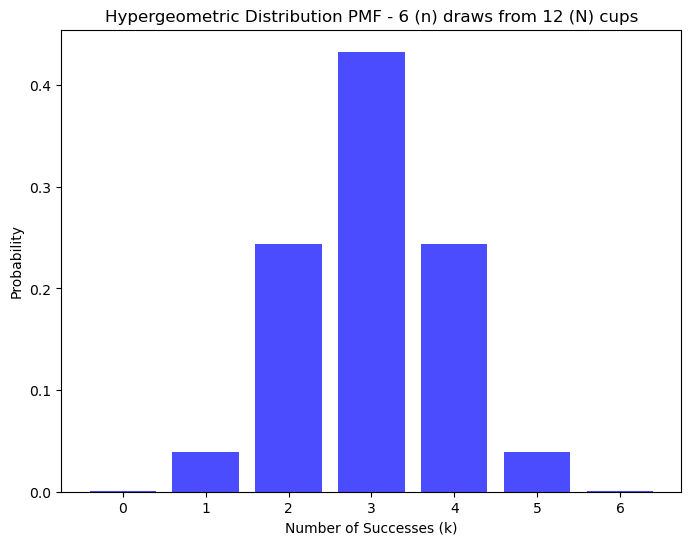

In [5]:
# Generate the hypergeometric distribution for all possible outcomes and plot
pmf = []
for i in range(6+1):
      prob =  (binomial_coef(6, i) * binomial_coef((12-6), (6-i)))/binomial_coef(12,6)   # [1]
      pmf.append(prob)

plt.figure(figsize=(8, 6))
plt.bar(range(6 + 1), pmf, color='blue', alpha=0.7)
plt.title('Hypergeometric Distribution PMF - 6 (n) draws from 12 (N) cups')
plt.xlabel('Number of Successes (k)')
plt.ylabel('Probability')
plt.show()

In [6]:
# Altenative method to calculate the probability of at least 4 successes (slightly different from lecture)
# Create a list of the population

import itertools
import numpy as np
import matplotlib.pyplot as plt
# Random selections.
# https://docs.python.org/3/library/random.html
import random
cups = ['milk_first','milk_first', 'milk_first', 'milk_first', 'milk_first', 'milk_first', 'tea_first', 'tea_first', 'tea_first', 'tea_first', 'tea_first', 'tea_first']
no_cups_milk_first = 6

combs = list(itertools.combinations(cups, no_cups_milk_first)) # the ways to choose 6 cups from 12
print(f'The number of ways of picking 6 items from the population is {len(combs)}')
combs

The number of ways of picking 6 items from the population is 924


[('milk_first',
  'milk_first',
  'milk_first',
  'milk_first',
  'milk_first',
  'milk_first'),
 ('milk_first',
  'milk_first',
  'milk_first',
  'milk_first',
  'milk_first',
  'tea_first'),
 ('milk_first',
  'milk_first',
  'milk_first',
  'milk_first',
  'milk_first',
  'tea_first'),
 ('milk_first',
  'milk_first',
  'milk_first',
  'milk_first',
  'milk_first',
  'tea_first'),
 ('milk_first',
  'milk_first',
  'milk_first',
  'milk_first',
  'milk_first',
  'tea_first'),
 ('milk_first',
  'milk_first',
  'milk_first',
  'milk_first',
  'milk_first',
  'tea_first'),
 ('milk_first',
  'milk_first',
  'milk_first',
  'milk_first',
  'milk_first',
  'tea_first'),
 ('milk_first',
  'milk_first',
  'milk_first',
  'milk_first',
  'milk_first',
  'tea_first'),
 ('milk_first',
  'milk_first',
  'milk_first',
  'milk_first',
  'milk_first',
  'tea_first'),
 ('milk_first',
  'milk_first',
  'milk_first',
  'milk_first',
  'milk_first',
  'tea_first'),
 ('milk_first',
  'milk_first',
  'milk

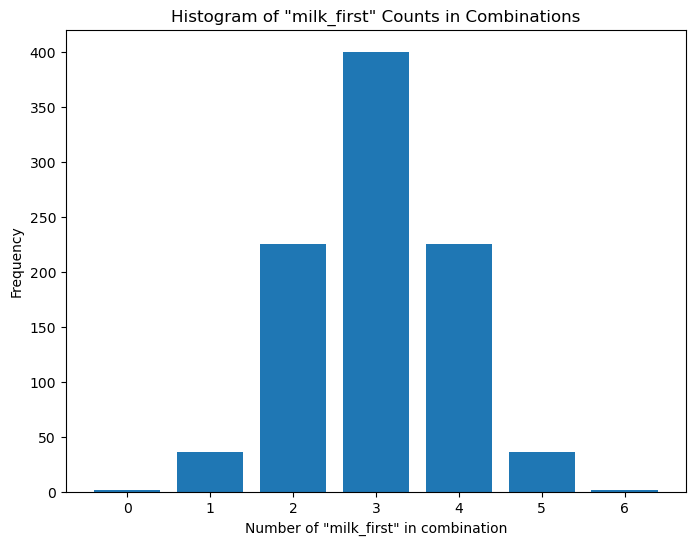

In [7]:
# For each combination, count the number of 'milk_first' items
milk_first_counts = [comb.count('milk_first') for comb in combs]

# Plot the histogram of counts
plt.figure(figsize=(8, 6))
counts, bins, _ = plt.hist(milk_first_counts, bins=range(0, max(milk_first_counts) + 2), align='left', rwidth=0.8)
plt.xlabel('Number of "milk_first" in combination')
plt.ylabel('Frequency')
plt.title('Histogram of "milk_first" Counts in Combinations')
plt.show()

In [8]:
counts

array([  1.,  36., 225., 400., 225.,  36.,   1.])

In [9]:
# Calculate the probability from the histogram data

successes_4 = sum(counts[4:])
successes_5 = sum(counts[5:])
total_combinations = sum(counts)
prob_4_or_more = successes_4 / total_combinations
prob_5_or_more = successes_5 / total_combinations

print(f'Probability of picking at least 4 with the milk first is {prob_4_or_more:.4f} or {prob_4_or_more*100:.2f}%')
print(f'Probability of picking at least 5 with the milk first is {prob_5_or_more:.4f} or {prob_5_or_more*100:.2f}%')

Probability of picking at least 4 with the milk first is 0.2835 or 28.35%
Probability of picking at least 5 with the milk first is 0.0400 or 4.00%


### Significance of allowing 2 mistakes [HOLD]

So, if the experiment is designed whereby the lady or tea-taster is allowed to make 2 mistakes, then there is a 28% chance that they will "pass" the test. Therefore there is a significant probability that the experiment will generate a false positive, i.e., the taster will choose the correct cups purely by chance. By comparison, allowing only 1 mistake would mean a <5% chance of picking the correct cups. This makes for a more robust experiment in that a false positive is unlikely or at least there is a <5% probability of a false positive.

## Task 2 - numpy's Normal Distribution <a id="Task2"></a> <span style="font-size: 8pt;"> [[TOC]](#toc)</span>

In [13]:
# Generate the random normal distributed data with numpy generator

import numpy as np
import matplotlib.pyplot as plt

n = 100000
mean = 10
st_dev = 3

data = np.random.normal(loc=mean, scale=st_dev, size=n)
data

array([ 6.76465869,  4.7111888 , 12.68155655, ...,  5.93690187,
        9.3541928 ,  7.37733787])

#### The Shapiro-Wilk Test

The Shapiro-Wilk test is a test of normality [5]. The null hypothesis of the test is that the data is normally distributed. If the p-value is less than the chosen alpha level, then the null hypothesis is rejected and there is evidence that the data is not normally distributed.

The p-value is the probability of observing a test statistic as extreme as the one computed, assuming that the null hypothesis is true. The p-value is used to determine the significance of the test. If the p-value is less than the significance level, the data is not normal.

In the example below, where the data has been generated using numpy's random.normal function, the Shapiro-Wilk test returns a p-value of 0.5. The p-value is compared to the alpha or significance level of 0.05 to determine if the null hypothesis can be rejected. The returned value of 0.501 indicates that the data is normally distributed.

The statistic or W value is a measure of the strength of the relationship between the data and the normal distribution. The closer W is to 1, the more likely the data is to be normally distributed.



In [12]:
# scipy.stats.shapiro() test
import scipy
statistic, pvalue = scipy.stats.shapiro(data)
print(f'Statistic: {statistic:.4f}, p-value: {pvalue:.4f}')

Statistic: 1.0000, p-value: 0.9464


The normal distribution probability distribution function is included in scipy stats package [6]. The random generated data can be automatically scaled when it is plotted using the plt.hist function. As expected, there is close agreement between the histogram of the data and the normal distribution pdf curve.


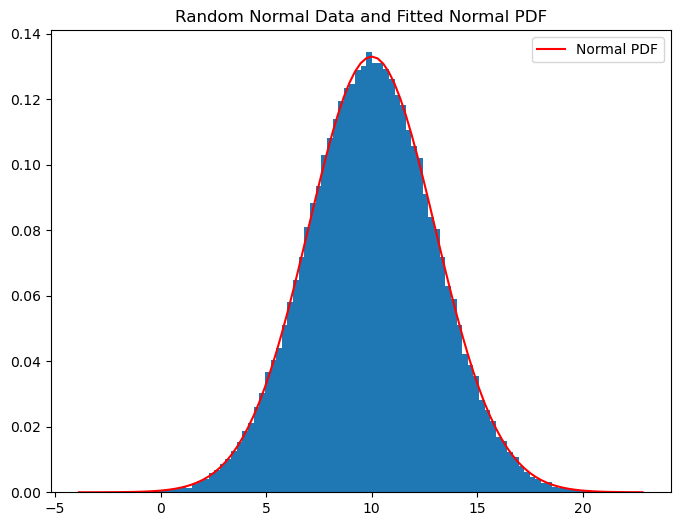

In [14]:
# Using scipy stats for normal pdf
from scipy.stats import norm

no_of_bins = 100
plt.figure(figsize=(8, 6))
count, bins, _ = plt.hist(data, bins=no_of_bins, density=True)  # Plot the normal random data normalised, return the bins and counts

# Use the bins returned from the histogram to plot the normal pdf
pdf_fitted_norm = norm.pdf(bins, loc=mean, scale=st_dev)  
plt.plot(bins, pdf_fitted_norm, 'r', label='Normal PDF');
plt.title('Random Normal Data and Fitted Normal PDF')
plt.legend();

### Task 3 - t-test Calculation <a id="Task3"></a> <span style="font-size: 8pt;"> [[TOC]](#toc)</span>

### Task 4 - ANOVA <a id="Task4"></a> <span style="font-size: 8pt;"> [[TOC]](#toc)</span>

## References <a id="Ref"></a> <span style="font-size: 8pt;"> [[TOC]](#toc)</span>

1. https://en.wikipedia.org/wiki/Lady_tasting_tea (accessed 23th Sept 2024)
2. https://en.wikipedia.org/wiki/Hypergeometric_distribution (accessed 26th Sept 2024)
3. https://numpy.org/doc/stable/reference/random/index.html (accessed 26th Sept 2024)
4. https://docs.python.org/3/library/math.html#math.comb (accessed 5th Oct 2024)
5. https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test (accessed 20th Oct 2024)
6. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html (accessed 20th Oct 2024)